<center> 
# R401: Statistical and Mathematical Foundations

<br> <br> 

## <center> Unconstrained Optimization. Static Optimization with Equality Constraints.

<br>

<center> **Andrey Vassilev**

<br> 


 

# 



In [2]:
%matplotlib notebook
import numpy as np
import scipy as sp
import scipy.optimize as spo
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex, HTML
import sympy as sym
sym.init_printing(use_unicode=True)

# Functions of one variable

$$ f(x) = x^3 $$

<IPython.core.display.Javascript object>


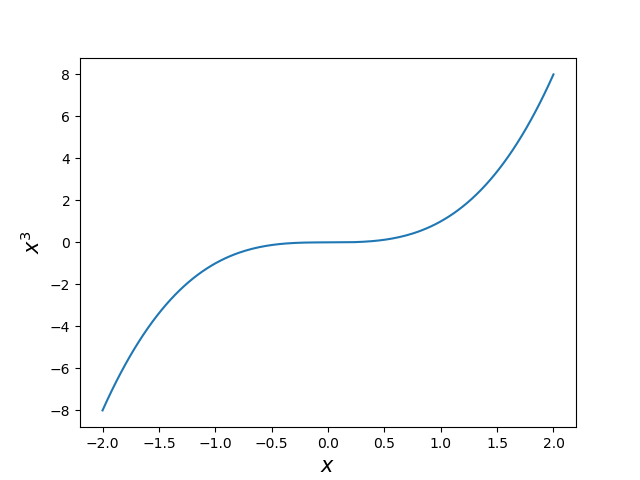

In [2]:
X = np.linspace(-2,2,200)
Y = X**3
f = plt.figure()
plt.plot(X,Y)
plt.xlabel('$x$',fontsize=15)
plt.ylabel('$x^3$',fontsize=15)
plt.show()

Minimize the function
$$f(x) = \ln \left( 1+ |x|^{2+\sin x} \right)$$

<IPython.core.display.Javascript object>


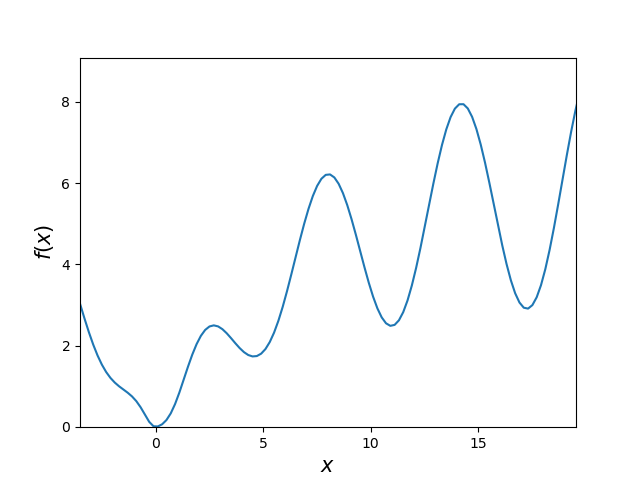

In [57]:
xmin = 3; xmax = 6; npoints = 1000
# Sequentially uncomment the following and rerun to see a more complete picture
# xmin = -5; xmax = 6; npoints = 1000
# xmin = -100; xmax = 100; npoints = 1000

X = np.linspace(xmin,xmax,npoints)
Y = np.log(1+np.abs(X)**(2+np.sin(X)))
f = plt.figure()
plt.plot(X,Y)
plt.xlabel('$x$',fontsize=15)
plt.ylabel('$f(x)$',fontsize=15)
plt.show()

`scipy.optimize` has a facility for minimizing scalar functions: `minimize_scalar`.

In [56]:
f = lambda x : np.log(1+np.abs(x)**(2+np.sin(x)))
sol = spo.minimize_scalar(f)
sol

     fun: 0.0
    nfev: 12
     nit: 11
 success: True
       x: -6.3489991873894959e-11

The `minimize_scalar` function has a method `bounded` which takes a tuple of two bounds defining an (open) interval to perform the evaluation on.

In [81]:
f = lambda x : np.log(1+np.abs(x)**(2+np.sin(x)))
sol = spo.minimize_scalar(f, bounds = (3.0,12.0), method = 'bounded')
sol

     fun: 1.7300207443240483
 message: 'Solution found.'
    nfev: 10
  status: 0
 success: True
       x: 4.5661194073604134

Try to change the upper bound to `14.0` to see how the method misses the minimum `4.566` to arrive at another local minimum yielding a higher value of the objective function.

# Functions of several variables

$$ f(x,y) = x^2+2y^2-3x+xy $$

<IPython.core.display.Javascript object>


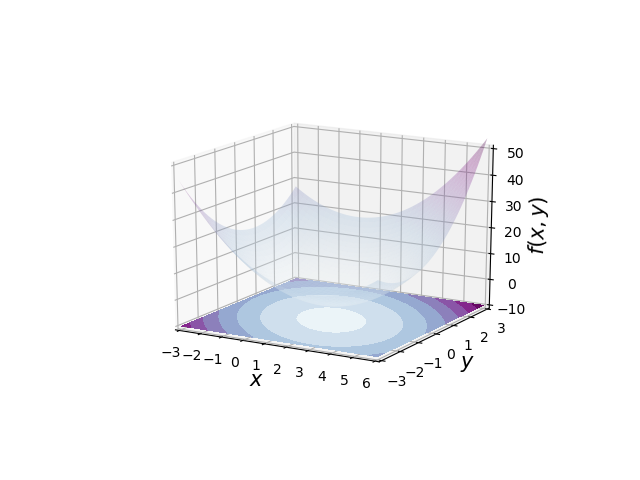

In [85]:

x,y = np.meshgrid(np.linspace(-3,6,200),np.linspace(-3,3,200))
z = x**2 +2*y**2-3*x+x*y
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z, 
                rstride=5, 
                cstride=5, 
                alpha=0.3,
                cmap=cm.BuPu)         

cset = ax.contourf(x, y, z, 
                   zdir='z',
                   offset=-10,
                   cmap=cm.BuPu)   
ax.set_xlabel('$x$',fontsize=15)
ax.set_xlim(-3, 6)
ax.set_ylabel('$y$',fontsize=15)
ax.set_ylim(-3, 3)
ax.set_zlabel('$f(x,y)$',fontsize=15)
ax.set_zlim(-10, 50)

ax.view_init(elev=18, azim=-60)           # elevation and angle
ax.dist=12   

plt.show()

$$ f(x,y) = x^2 - y^2 $$

<IPython.core.display.Javascript object>


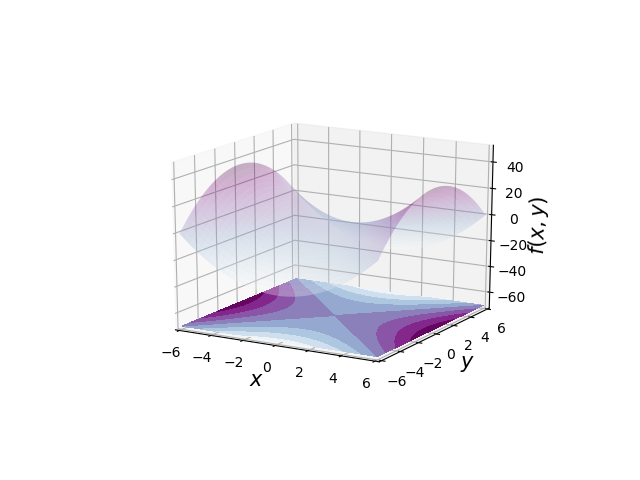

In [4]:
x,y = np.meshgrid(np.linspace(-6,6,200),np.linspace(-6,6,200))
z = x**2 - y**2
fig = plt.figure()
ax = fig.gca(projection='3d')         # set the 3d axes
ax.plot_surface(x, y, z, 
                rstride=5, 
                cstride=5, 
                alpha=0.3,            # transparency of the surface 
                cmap=cm.BuPu)         # colour map

cset = ax.contourf(x, y, z, 
                   zdir='z',          # direction of contour projection
                   offset=-70,        # how "far" render the contour map
                   cmap=cm.BuPu)      # colour map
ax.set_xlabel('$x$',fontsize=15)
ax.set_xlim(-6, 6)
ax.set_ylabel('$y$',fontsize=15)
ax.set_ylim(-6, 6)
ax.set_zlabel('$f(x,y)$',fontsize=15)
ax.set_zlim(-70, 50)

ax.view_init(elev=18, azim=-60)           # elevation and angle
ax.dist=12   

plt.show()

- For functions of more than one variable `scipy.optimize` offers the `minimize` function.
- `minimize` requires an objective function to be minimized and an initial guess for the solution.
- It can also take other arguments.
- The objective function should accept a 1-D Numpy array as its first argument.
- The initial guess should also be a 1-D Numpy array.

In [86]:
f = lambda x: x[0]**2 +2*x[1]**2-3*x[0]+x[0]*x[1]
initguess = np.array([1.0,1.0])
sol = spo.minimize(f,initguess)
sol

      fun: -2.5714285714283367
 hess_inv: array([[ 0.57364716, -0.14381473],
       [-0.14381473,  0.28612781]])
      jac: array([  7.74860382e-07,  -3.57627869e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([ 1.71428621, -0.42857165])

# Optimization under equality constraints

# Symbolic solution example

Consider the utility maximization problem
$$\max_{x_1,x_2} x_1^a x_2^b$$
s.t.
$$p_1 x_1+p_2 x_2 = I.$$

In [40]:
x1,x2,p1,p2,I,a,b = sym.symbols('x1,x2,p1,p2,I,a,b')
lmbda = sym.symbols('lmbda')
L = x1**a*x2**b - lmbda*(p1*x1+p2*x2-I)
d1 = L.diff(x1)
d2 = L.diff(x2)
res = sym.solve([d1,d2,p1*x1+p2*x2-I],x1,x2,lmbda)
x1sol = res[0][0]
x2sol = res[0][1]

display(Latex(r"$x_1="+sym.latex(x1sol)+r"$"))
display(Latex(r"$x_2="+sym.latex(x2sol)+r"$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Numerical solution example

- The function `minimize` from `scipy.optimize` also allows us to solve minimization problems subject to eqality and/or inequality constraints. 
- The general problem solved by `minimize` is the following:
$$\min_{x}f(x)$$ subject to

$$g_i(x) \geq 0,~  i = 1,...,m,$$
$$h_j(x)  = 0,~  j = 1,...,p.$$
- We shall deal with the case of equality constraints here.

- Constraints are syntactically defined using a tuple of dictionaries passed via the `constraints` keyword argument.
- Each dictionary should have (at least) the structure 
```
{'type' : 'eq', 'fun' : <function>}
```
- In the case of more than one equality constraint they can be defined in two alternative ways: 
  - By means of separate dictionaries (one dictionary per constraint with the respective function returning a scalar output)
  - By means of one dictionary containing a vector function that encompasses all the constraints
- Bounds on the variables are handled separately for convenience via a separate `bounds` keyword argument.

Maximize the function $$f(x_1,x_2) = x_1x_2$$
subject to $$x_1+x_2=6.$$

In [4]:
fun = lambda x: -x[0]*x[1] # We reverse the sign as we are using minimize
cons = ({'type': 'eq', 'fun': lambda x:  x[0] + x[1] - 6})
sol = spo.minimize(fun, x0 = np.array([0,0]), method='SLSQP', constraints=cons)
sol

     fun: -8.999999999999995
     jac: array([-3., -3.])
 message: 'Optimization terminated successfully.'
    nfev: 8
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([ 3.,  3.])

Find the minima and maxima of the function $$f(x_1,x_2) = x_1 -2x_2+2x_3$$
subject to $$x_1^2+x_2^2+x_3^2=1.$$

In [5]:
fun = lambda x: x[0]-2*x[1]+2*x[2] 
cons = ({'type': 'eq', 'fun': lambda x:  x[0]**2 + x[1]**2 + x[2]**2 - 1})
sol = spo.minimize(fun, x0 = np.array([0,0,0]), method='SLSQP', constraints=cons)
sol

     fun: -3.0000000000015077
     jac: array([ 1., -2.,  2.])
 message: 'Optimization terminated successfully.'
    nfev: 67
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([-0.33333296,  0.66666656, -0.66666695])

In [6]:
fun = lambda x: -(x[0]-2*x[1]+2*x[2]) # We reverse the sign as we are using minimize
cons = ({'type': 'eq', 'fun': lambda x:  x[0]**2 + x[1]**2 + x[2]**2 - 1})
sol = spo.minimize(fun, x0 = np.array([0,0,0]), method='SLSQP', constraints=cons)
sol

     fun: -3.000000027410752
     jac: array([-1.,  2., -2.])
 message: 'Optimization terminated successfully.'
    nfev: 56
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([ 0.33333219, -0.66666816,  0.66666576])